# Problem Statement 3:
You are working in an e-commerce company, and your company has put forward a task to
analyze the customer reviews for various products. You are supposed to create a report that
classifies the products based on the customer reviews.
Dataset Information:
The **Reviews.csv** dataset contains 60145 rows and 10 columns.

**Feature Name - Description:**

1.Id - Record ID
2.ProductId - Product ID
3.UserId - User ID who posted the review
4.ProfileName - Profile name of the User
5.HelpfullnessNumerator - Numerator of the helpfulness of the review
6.HelpfullnessDenominator - Denominator of the helpfulness of the review
7.Score - Product Rating
8.Time - Review time in timestamp
9.Summary - Summary of the review
10.Text - Actual text of the review

1. Find various trends and patterns in the reviews data, create useful insights that
best describe the product quality.
2. Classify each review based on the sentiment associated with the same.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Reviews (1).csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#Shape of the dataset
df.shape

(568454, 10)

In [ ]:
#Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
#Checking null values
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [ ]:
#Drop null values
df.dropna(inplace=True)

In [ ]:
#Checking null values
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [ ]:
#Columns in dataset
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
#Unique values in product
df['ProductId'].unique()

array(['B001E4KFG0', 'B00813GRG4', 'B000LQOCH0', ..., 'B003S1WTCU',
       'B004I613EE', 'B001LR2CU2'], dtype=object)

In [ ]:
#Sum of unique values in product
df['ProductId'].nunique()

74257

In [ ]:
#Change datatype of time to timestamp
df['Time'] = pd.to_datetime(df['Time'], unit='s')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      568401 non-null  int64         
 1   ProductId               568401 non-null  object        
 2   UserId                  568401 non-null  object        
 3   ProfileName             568401 non-null  object        
 4   HelpfulnessNumerator    568401 non-null  int64         
 5   HelpfulnessDenominator  568401 non-null  int64         
 6   Score                   568401 non-null  int64         
 7   Time                    568401 non-null  datetime64[ns]
 8   Summary                 568401 non-null  object        
 9   Text                    568401 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 47.7+ MB


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


### EDA

In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568401.000000,568401.000000,568401.000000,568401.000000,568401
mean,284228.120582,1.743903,2.227911,4.183297,2011-01-29 00:23:52.802545664
min,1.000000,0.000000,0.000000,1.000000,1999-10-08 00:00:00
25%,142116.000000,0.000000,0.000000,4.000000,2010-04-15 00:00:00
50%,284225.000000,0.000000,1.000000,5.000000,2011-07-20 00:00:00
75%,426342.000000,2.000000,2.000000,5.000000,2012-03-26 00:00:00
max,568454.000000,866.000000,923.000000,5.000000,2012-10-26 00:00:00
std,164098.955187,7.636845,8.288820,1.310376,NaN


In [ ]:
#Distribution of rating
df['Score'].value_counts()

,count
Score,
5,363102
4,80654
1,52264
3,42638
2,29743


### Sentiment Analysis


In [ ]:
!pip install nltk

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Preprocess review
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df['Text'] = df['Text'].apply(preprocess_text)

In [ ]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Score'], test_size=0.2, random_state=42)

In [ ]:
#Create Tf-idf vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Naive Bayes

In [ ]:
#Train Naive Bayes
model=MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
#Evaluate model
y_pred = model.predict(X_test_tfidf)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.671405072087684
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.33      0.45     10515
           2       0.50      0.01      0.01      5937
           3       0.42      0.01      0.03      8460
           4       0.45      0.03      0.05     16026
           5       0.67      0.99      0.80     72743

    accuracy                           0.67    113681
   macro avg       0.55      0.27      0.27    113681
weighted avg       0.62      0.67      0.56    113681



In [ ]:
#Identify valid points for improvement:
def extract_improvement_points(df, threshold=3):
    improvement_points = []
    for index, row in df.iterrows():
        if row['Score'] < threshold:
            improvement_points.append(row['Text'])
    return improvement_points

improvement_points = extract_improvement_points(df)



In [ ]:
# Print improvement points
print('Improvement Points:')
for point in improvement_points:
    print(point)

Streaming output truncated to the last 5000 lines.
coffee taste good sweet liking also seem use instant coffee leave bad aftertaste
first coffee instant powdered mix completely disappointing expecting flavored coffee instant mix small container kind defeat purpose guess fault read package product description indicate instant coffee br br would never buy product smell wonderful taste like simply good someone looking cup coffee
received cappuccino k cup grove square mailer box even original box unable see nutrional value three type coffee super sweet disappointed stuck k cup
typically love vanilla cappuccino tried many brand excited try however dump strong artificial sweetener taste also verified low sugar low calorie box something happened packaging product bad recipe however buy
ingredient partially hydrogenated vegetable oil may contain coconut soybean sunflower palm canola sugar corn syrup solid instant coffee sodium caseinate salt natural artificial flavor cocoa processed alkali dip

### VADER

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
#Download Vader sentiment analyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
#Define function to analyze sentiment
def analyze_sentiment(Score):
  if Score >= 4:
    return 'positive'
  elif Score <= 2:
    return 'negative'
  else:
    return 'neutral'

In [ ]:
#Apply sentiment analysis to the 'Score'
df['sentiment'] = df['Score'].apply(analyze_sentiment)

In [ ]:
df['sentiment'].head()

,sentiment
0,positive
1,negative
2,positive
3,negative
4,positive


In [ ]:
#Calculate VADER metrics for the 'Text'
df['vader_scores'] = df['Text'].apply(lambda x: sia.polarity_scores(x))

In [ ]:
#Convert the 'vader metrics' column to separate column for each metric
df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])

In [ ]:
#Drop 'vader metrics' column
df.drop('vader_scores', axis=1, inplace=True)

In [ ]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,vader_compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,bought several vitality canned dog food produc...,positive,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arrived labeled jumbo salted peanut pe...,negative,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",confection around century light pillowy citrus...,positive,0.8624
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,looking secret ingredient robitussin believe f...,negative,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,great taffy great price wide assortment yummy ...,positive,0.9468
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,got wild hair taffy ordered five pound bag taf...,positive,0.9136
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,saltwater taffy great flavor soft chewy candy ...,positive,0.9463
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,2012-05-03,"Wonderful, tasty taffy",taffy good soft chewy flavor amazing would def...,positive,0.9313
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,2011-11-23,Yay Barley,right mostly sprouting cat eat grass love rota...,positive,0.6369
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,2012-10-26,Healthy Dog Food,healthy dog food good digestion also good smal...,positive,0.8176


### Word Cloud


In [ ]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Join text data into a single string
text = ' '.join(df['Text'])

In [ ]:
# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, max_font_size=110).generate(text)

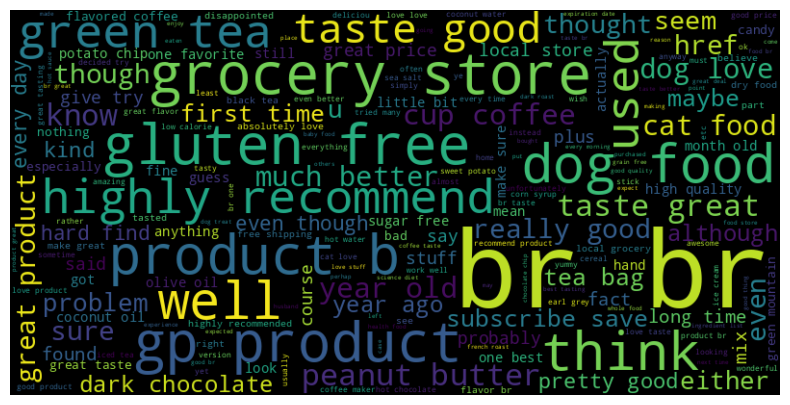

In [ ]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Visualization

In [ ]:
#Helpfulness Ratio Distribution
df['helpfulness_ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']


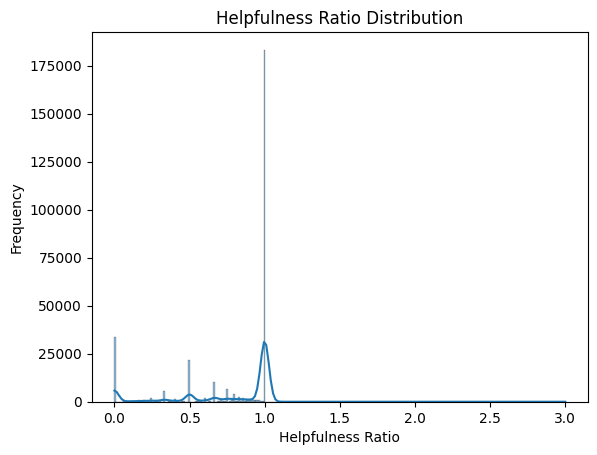

In [ ]:
sns.histplot(df['helpfulness_ratio'], kde=True)
plt.title('Helpfulness Ratio Distribution')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Top 10 Most Helpful Reviewers
top_reviewers = df.groupby('UserId')['HelpfulnessNumerator'].sum().nlargest(10)

Text(0, 0.5, 'Total Helpfulness')

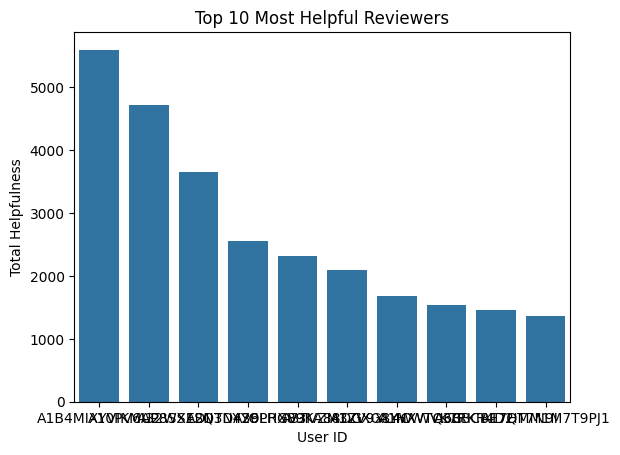

In [ ]:
sns.barplot(x=top_reviewers.index, y=top_reviewers.values)
plt.title('Top 10 Most Helpful Reviewers')
plt.xlabel('User ID')
plt.ylabel('Total Helpfulness')

In [ ]:
#Top 10 Most Reviewed Products
top_products = df['ProductId'].value_counts().head(10)


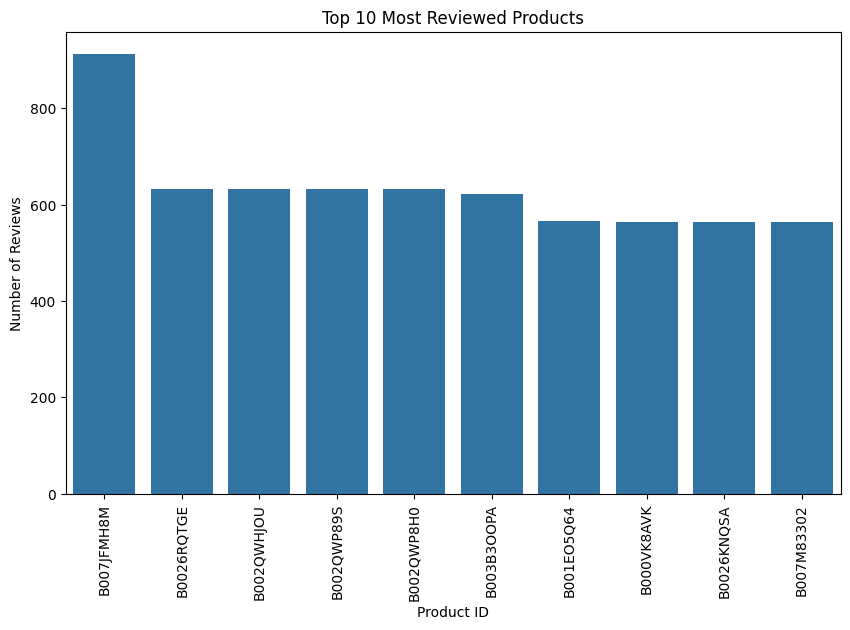

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()